Скачайте материалы к ДЗ. Проанализируйте ряды, сделайте их стационарными.
Решением будет ссылка на гитхаб с ноутбуком

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()

In [3]:
sales_of_company_x = pd.read_csv("../data/Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("../data/Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("../data/Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("../data/Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("../data/Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("../data/Series/daily-total-female-births-in-cal.csv")

In [4]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

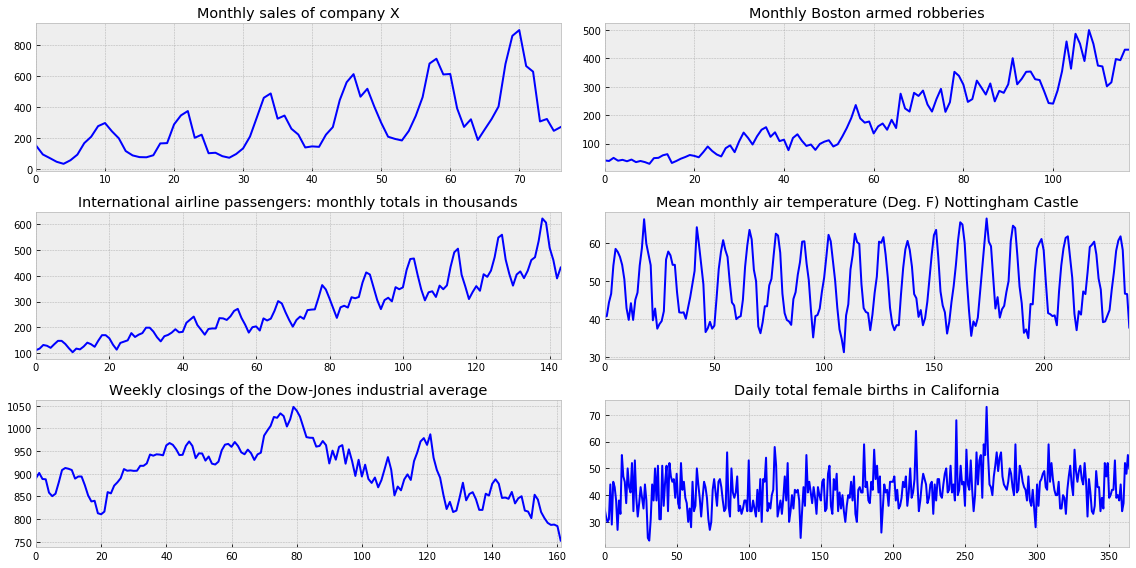

In [5]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

#### 1. Monthly sales of company X

In [6]:
SERIES_NAME = "Monthly sales of company X"

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\Users\Gordeychik\AppData\Local\Continuum\anaconda3\envs\tf-1.14\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


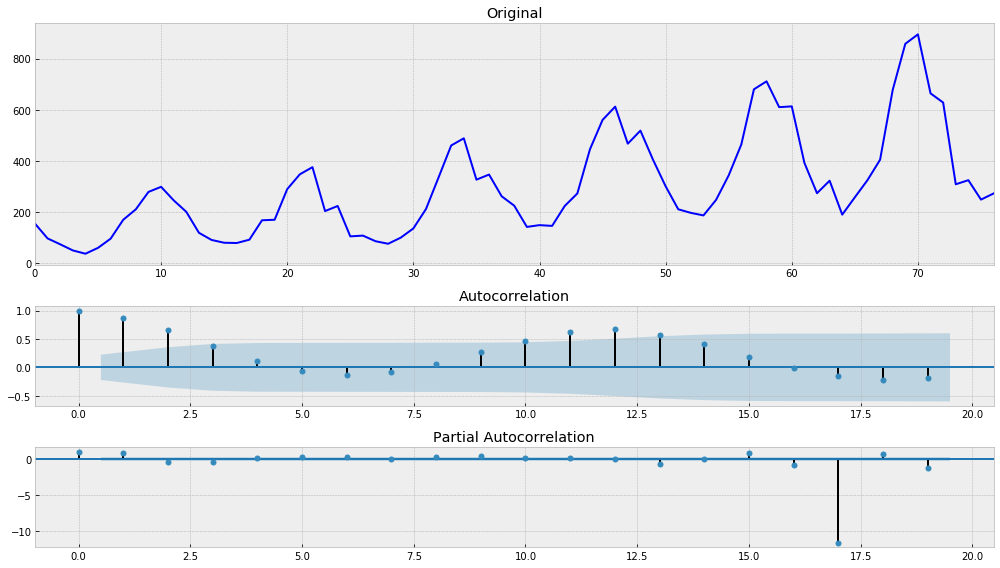

In [7]:
tsplot(all_series[SERIES_NAME])

In [8]:
#нормализуем дисперсию
series = boxcox(all_series[SERIES_NAME], 0)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\Users\Gordeychik\AppData\Local\Continuum\anaconda3\envs\tf-1.14\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


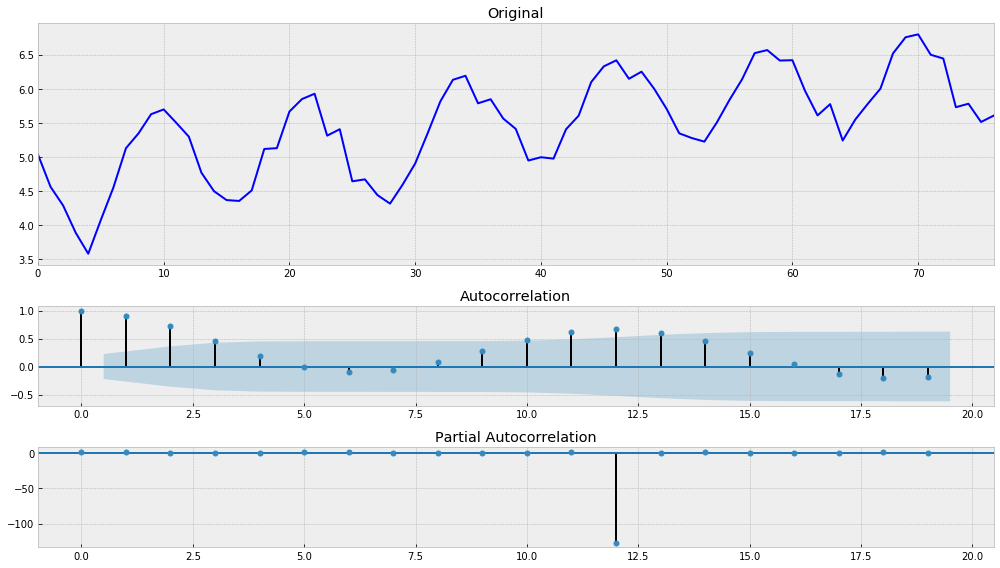

In [9]:
tsplot(series)

In [10]:
#убираем тренд дифференцированием
series = np.diff(series)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


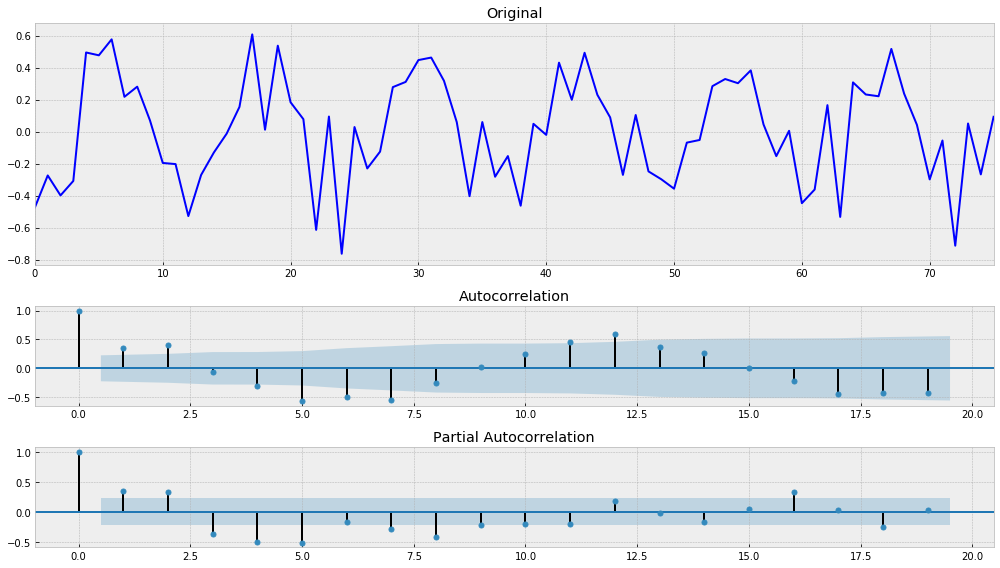

In [11]:
tsplot(series)

Тест Дики-Фуллера опровергает гипотезу о нестационарности ряда. Полученный ряд стационарен.

#### 2. International airline passengers: monthly totals in thousands

In [12]:
SERIES_NAME = "International airline passengers: monthly totals in thousands"

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


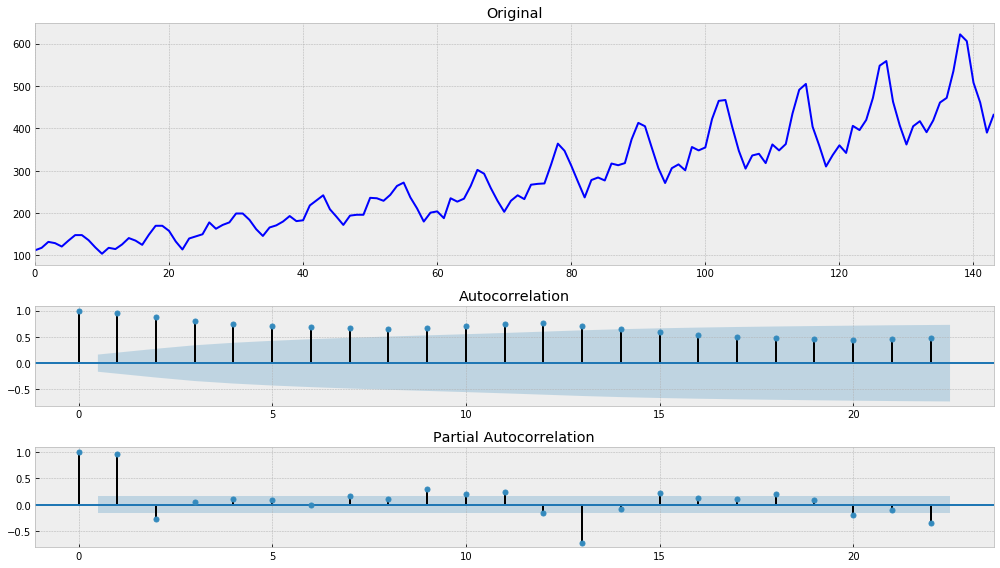

In [13]:
tsplot(all_series[SERIES_NAME])

In [14]:
#нормализуем дисперсию
series = boxcox(all_series[SERIES_NAME], 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


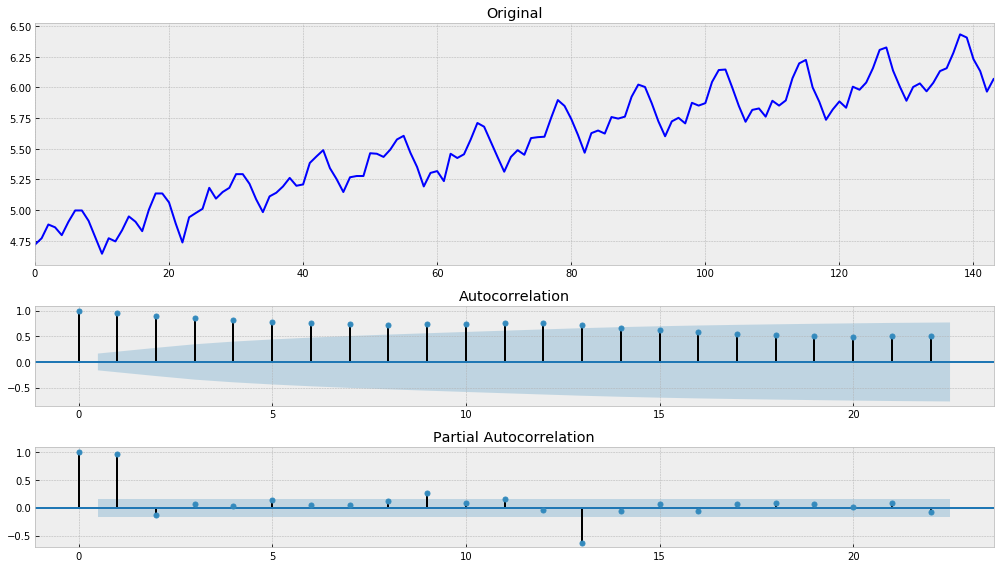

In [15]:
tsplot(series)

In [16]:
#убираем тренд дифференцированием
series = np.diff(series)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


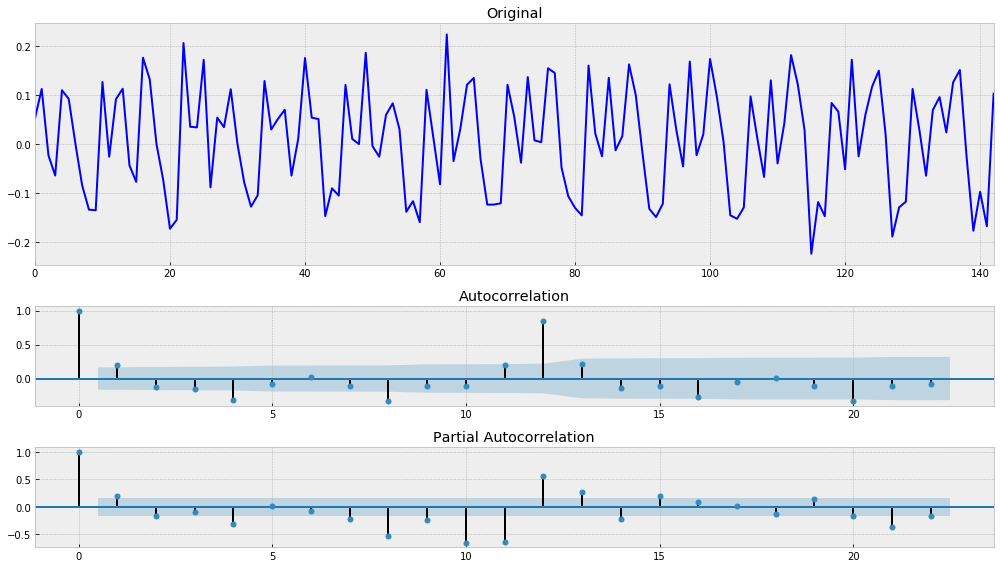

In [17]:
tsplot(series)

In [18]:
# Ряд всё ещё не стационарен. Убираем сезонность
series = series[12:] - series[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


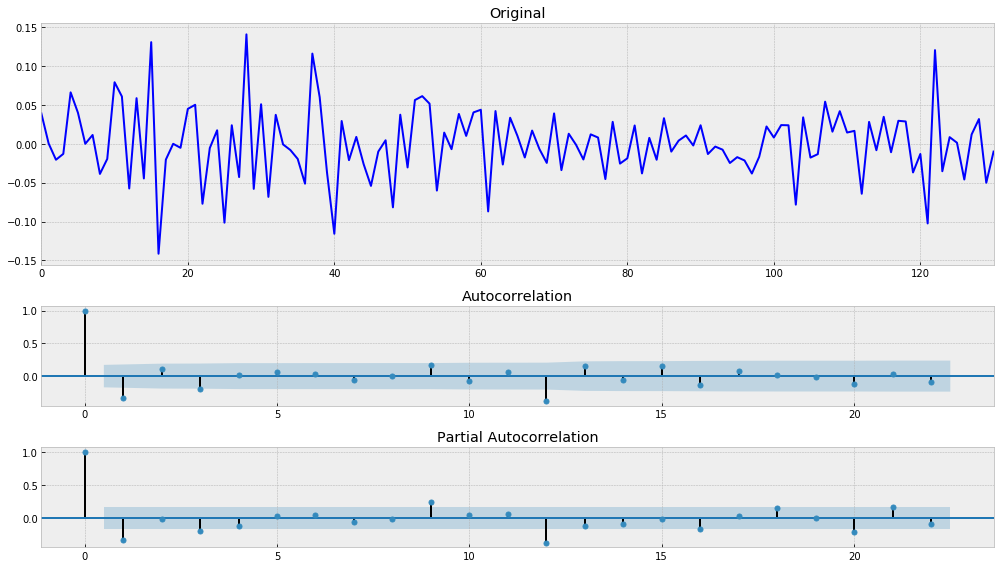

In [19]:
tsplot(series)

Тест Дики-Фуллера опровергает гипотезу о нестационарности ряда. Полученный ряд стационарен.

#### 3. Mean monthly air temperature (Deg. F) Nottingham Castle

In [20]:
SERIES_NAME = "Mean monthly air temperature (Deg. F) Nottingham Castle"

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


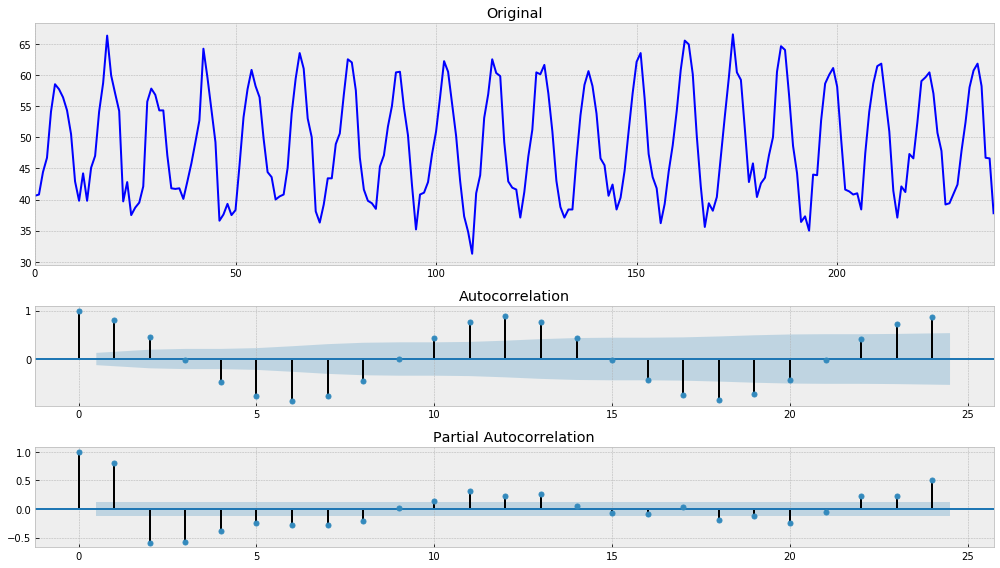

In [21]:
tsplot(all_series[SERIES_NAME])

Тест Дики-Фуллера опровергает гипотезу о нестанционарности ряда, но на коррелограмме явно прослеживается сезонность, попробуем от нее избавиться

In [22]:
series = series[12:]-series[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -5.329259
p-value                          0.000005
#Lags Used                      12.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


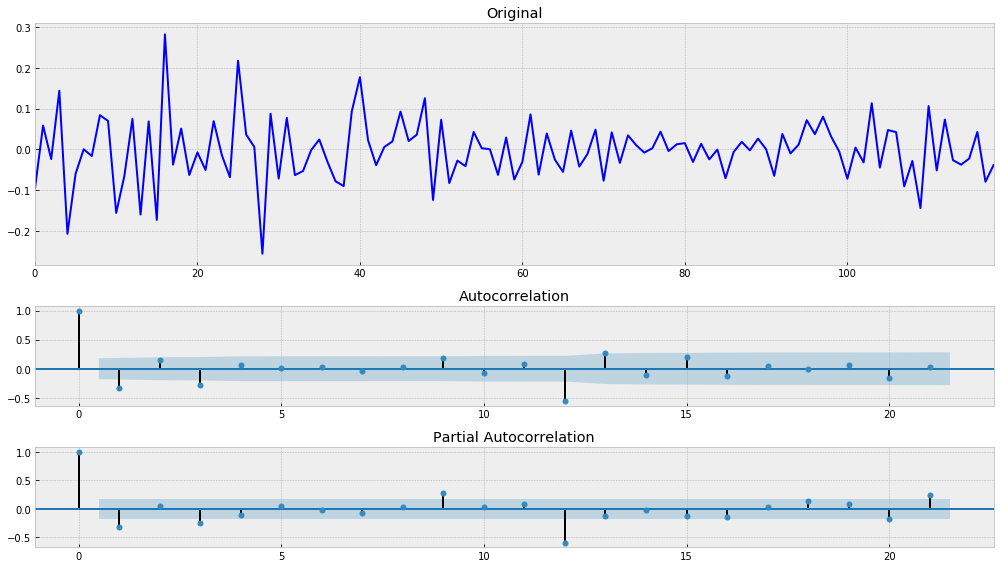

In [23]:
tsplot(series)

Тест Дики-Фуллера опровергает гипотезу о нестационарности ряда. Полученный ряд стационарен.

#### 4. Weekly closings of the Dow-Jones industrial average

In [24]:
SERIES_NAME = "Weekly closings of the Dow-Jones industrial average"

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


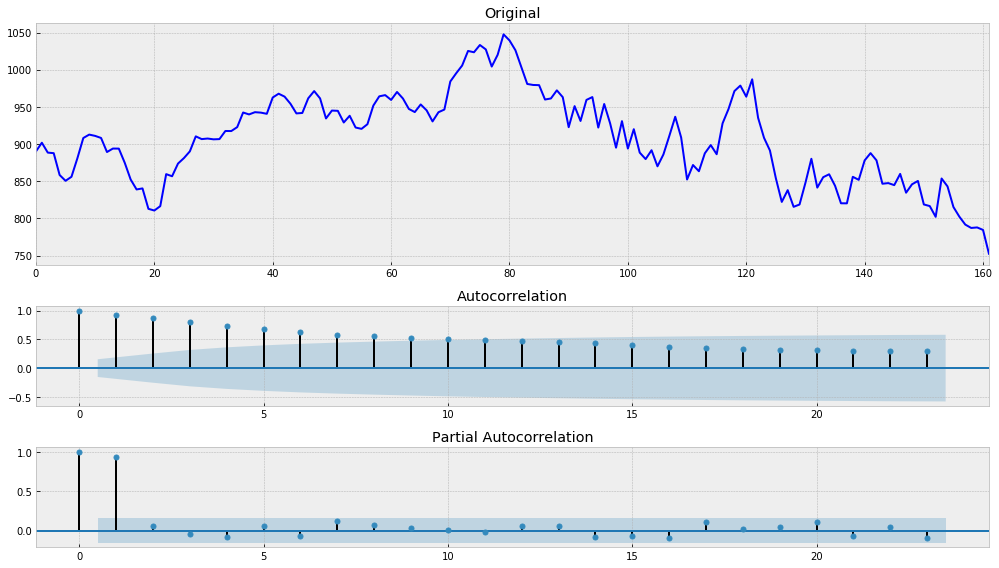

In [25]:
tsplot(all_series[SERIES_NAME])

In [26]:
#нормализуем дисперсию
series = boxcox(all_series[SERIES_NAME], 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


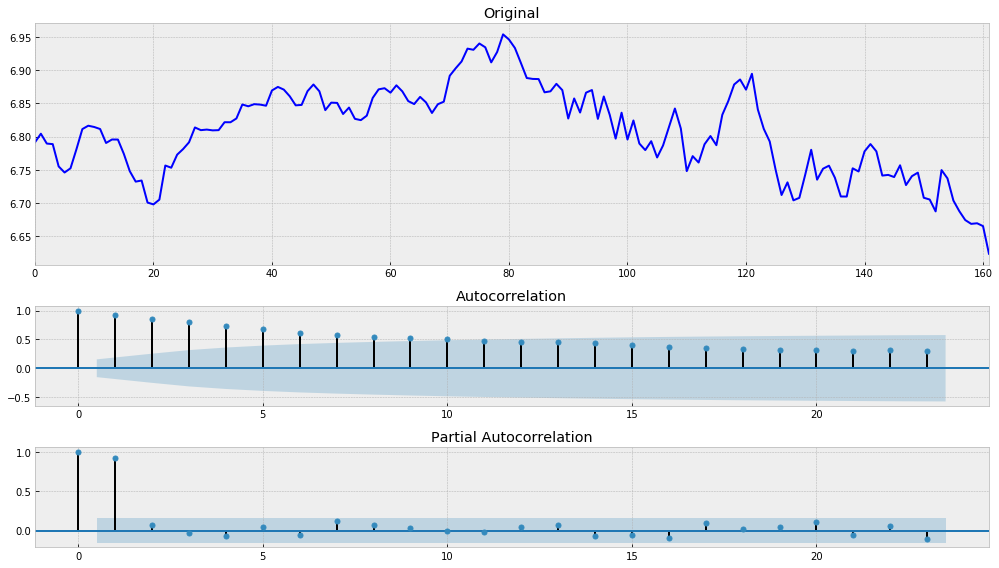

In [27]:
tsplot(series)

In [28]:
#убираем тренд дифференцированием
series = np.diff(series)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


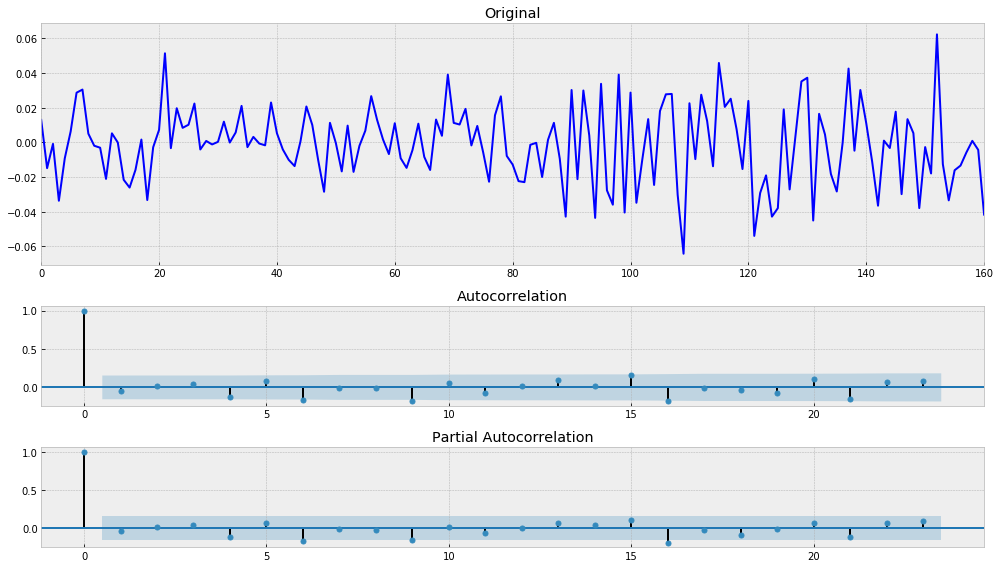

In [29]:
tsplot(series)

Тест Дики-Фуллера опровергает гипотезу о нестационарности ряда. Полученный ряд стационарен.

#### 5. Daily total female births in California

In [30]:
SERIES_NAME = "Daily total female births in California"

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


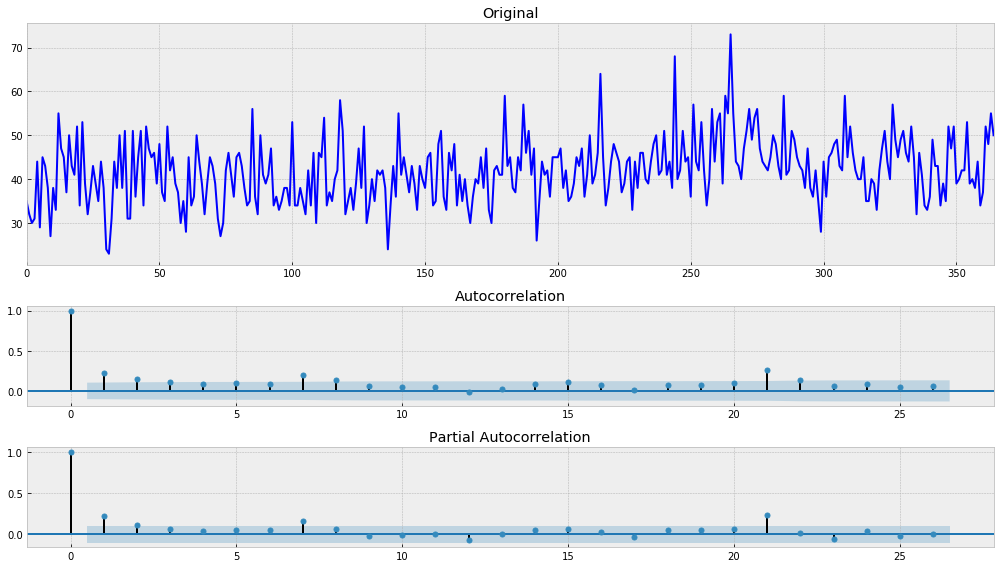

In [31]:
tsplot(all_series[SERIES_NAME])

Тест Дики-Фуллера опровергает гипотезу о нестационарности ряда. Делаем вывод - ряз изначально стационарен, преобразований не требуется.